In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Input File

In [3]:
Data_train=pd.read_csv('./data/train.csv')

Data_test=pd.read_csv('./data/test.csv')

Data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 對SalePrice去skewness

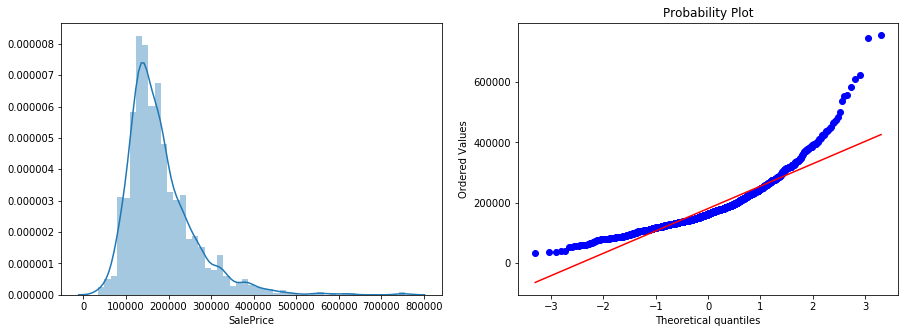

In [4]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(Data_train['SalePrice'])

plt.subplot(1,2,2)
res = stats.probplot(Data_train['SalePrice'], plot=plt)

In [5]:
Data_train["SalePrice"]=Data_train["SalePrice"].apply(np.log)

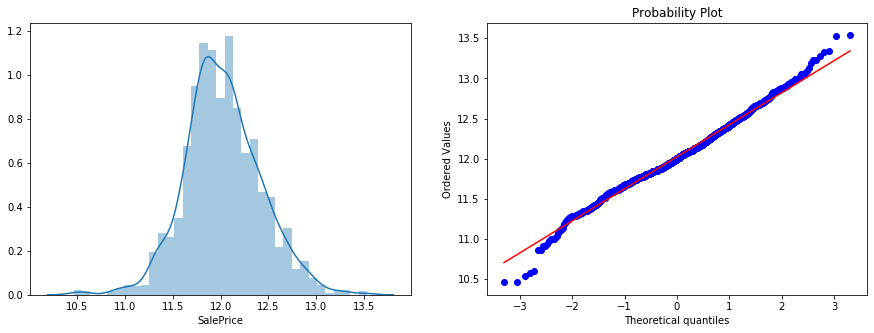

In [6]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(Data_train['SalePrice'])

plt.subplot(1,2,2)
res = stats.probplot(Data_train['SalePrice'], plot=plt)

# 填補空值

In [7]:
train_label=Data_train['SalePrice']

In [8]:
Data_train.drop('SalePrice',axis=1,inplace=True)

In [9]:
AllData=pd.concat([Data_train,Data_test],axis=0)

In [10]:
AllData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [11]:
AllData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [12]:
plotNaN=AllData.isna().sum().sort_values()/len(AllData)
plotNaN=pd.DataFrame(plotNaN)
plotNaN.columns=['Nan_percentage']
plotNaN=plotNaN[plotNaN['Nan_percentage']!=0]
plotNaN

,Nan_percentage
GarageCars,0.000343
GarageArea,0.000343
KitchenQual,0.000343
Electrical,0.000343
SaleType,0.000343
TotalBsmtSF,0.000343
BsmtUnfSF,0.000343
BsmtFinSF2,0.000343
Exterior2nd,0.000343
Exterior1st,0.000343


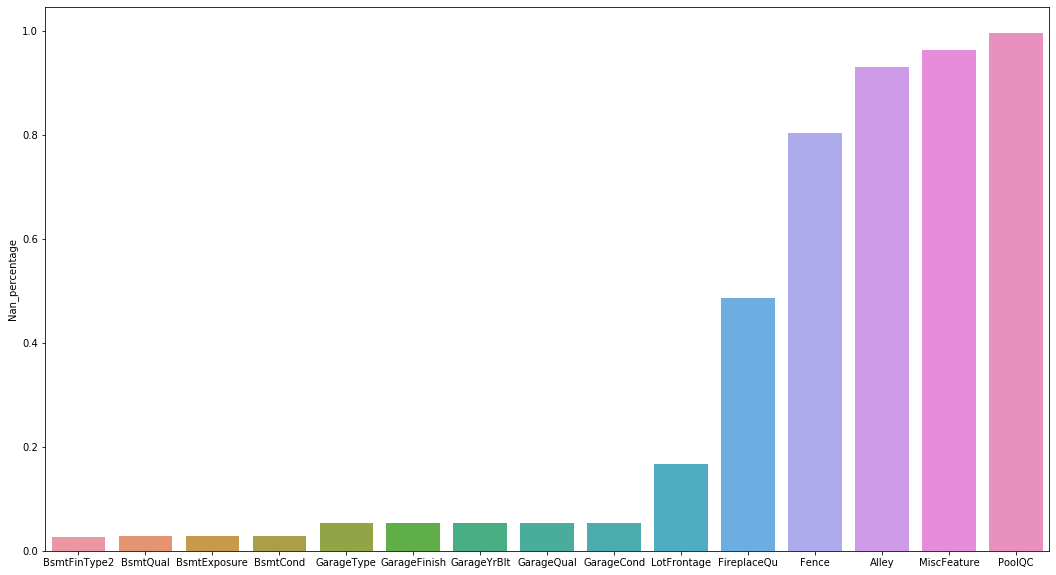

In [13]:
fig = plt.figure(figsize=(18,10))
sns.barplot(x=plotNaN.index[-15:],y='Nan_percentage',data=plotNaN[-15:])

In [14]:
## Some missing values are intentionally left blank, for example: In the Alley feature 
## there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    AllData[i] = AllData[i].fillna('None')

In [15]:
## In the following features the null values are there for a purpose, so we replace them with "0"
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    AllData[i] = AllData[i].fillna(0)

In [16]:
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
AllData['LotFrontage'] = AllData.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [17]:
AllData['Exterior2nd'] = AllData.fillna(AllData['Exterior2nd'].mode().values[0])
AllData['KitchenQual'] = AllData.fillna(AllData['KitchenQual'].mode().values[0])
AllData['Electrical'] = AllData.fillna(AllData['Electrical'].mode().values[0])
AllData['Exterior1st'] = AllData.fillna(AllData['Exterior1st'].mode().values[0])
AllData['SaleType'] = AllData.fillna(AllData['SaleType'].mode().values[0])
AllData['Utilities'] = AllData.fillna(AllData['Utilities'].mode().values[0])
AllData['Functional'] = AllData.fillna(AllData['Functional'].mode().values[0])
AllData['MSZoning'] = AllData.fillna(AllData['MSZoning'].mode().values[0])

In [18]:
plotNaN=AllData.isna().sum().sort_values()/len(AllData)
plotNaN=pd.DataFrame(plotNaN)
plotNaN.columns=['Nan_percentage']
plotNaN=plotNaN[plotNaN['Nan_percentage']!=0]
plotNaN

,Nan_percentage


# 去除outlier

Data_train

#GrLivArea
sns.regplot(x="GrLivArea", y=train_label, data=Data_train, marker='*', color='green', scatter_kws={'s':2})

Data_train[Data_train['GrLivArea']>4500]

print('AllData:',AllData.shape)
print('Data_train:',Data_train.shape)
print('Data_test:',Data_test.shape)
#train_label

outliers = [ 524, 1299]
Data_train=AllData[:len(Data_train)]
Data_test=AllData[len(Data_train):]
Data_train=pd.concat([Data_train,train_label],axis=1)
Data_train=Data_train[Data_train['GrLivArea']<=4500]

AllData=pd.concat([Data_train,Data_test],axis=0)
train_label=Data_train['SalePrice']

#GrLivArea
sns.regplot(x="GrLivArea", y=train_label, data=Data_train, marker='*', color='green', scatter_kws={'s':2})

# 特徵工程

# Encoding

In [19]:
#使用全部feature 進行訓練
AllData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,1,65.0,8450,Pave,None,Reg,Lvl,1,...,0,0,None,None,None,0,2,2008,1,Normal
1,2,20,2,80.0,9600,Pave,None,Reg,Lvl,2,...,0,0,None,None,None,0,5,2007,2,Normal
2,3,60,3,68.0,11250,Pave,None,IR1,Lvl,3,...,0,0,None,None,None,0,9,2008,3,Normal
3,4,70,4,60.0,9550,Pave,None,IR1,Lvl,4,...,0,0,None,None,None,0,2,2006,4,Abnorml
4,5,60,5,84.0,14260,Pave,None,IR1,Lvl,5,...,0,0,None,None,None,0,12,2008,5,Normal


In [20]:
AllData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [21]:
#object to int 
Object_int=['MSZoning','Utilities' ,'Exterior1st','Exterior2nd','Electrical','KitchenQual','Functional','SaleType']
for i in Object_int:
    AllData[i]=AllData[i].astype('int')

In [22]:
Float_int=['BsmtFullBath','BsmtHalfBath','GarageCars']
for i in Float_int:
    AllData[i]=AllData[i].astype('int')

In [23]:
AllDataId=AllData['Id']
AllData=AllData.drop('Id',axis=1)

In [24]:
AllData = pd.get_dummies(AllData).reset_index(drop=True)
AllData.shape

(2919, 247)

In [25]:
AllData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,1,65.0,8450,1,7,5,2003,2003,1,...,1,0,0,0,0,0,0,0,1,0
1,20,2,80.0,9600,2,6,8,1976,1976,2,...,1,0,0,0,0,0,0,0,1,0
2,60,3,68.0,11250,3,7,5,2001,2002,3,...,1,0,0,0,0,0,0,0,1,0
3,70,4,60.0,9550,4,7,5,1915,1970,4,...,1,0,0,0,1,0,0,0,0,0
4,60,5,84.0,14260,5,8,5,2000,2000,5,...,1,0,0,0,0,0,0,0,1,0


In [26]:
#Selected_AllData=AllData[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','KitchenQual']]
Selected_AllData=AllData
Selected_AllData

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,1,65.0,8450,1,7,5,2003,2003,1,...,1,0,0,0,0,0,0,0,1,0
1,20,2,80.0,9600,2,6,8,1976,1976,2,...,1,0,0,0,0,0,0,0,1,0
2,60,3,68.0,11250,3,7,5,2001,2002,3,...,1,0,0,0,0,0,0,0,1,0
3,70,4,60.0,9550,4,7,5,1915,1970,4,...,1,0,0,0,1,0,0,0,0,0
4,60,5,84.0,14260,5,8,5,2000,2000,5,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,2915,21.0,1936,2915,4,7,1970,1970,2915,...,1,0,0,0,0,0,0,0,1,0
2915,160,2916,21.0,1894,2916,4,5,1970,1970,2916,...,1,0,0,0,1,0,0,0,0,0
2916,20,2917,160.0,20000,2917,5,7,1960,1996,2917,...,1,0,0,0,1,0,0,0,0,0
2917,85,2918,62.0,10441,2918,5,5,1992,1992,2918,...,0,0,1,0,0,0,0,0,1,0


# 訓練模型

In [27]:
Data_train=AllData[:len(Data_train)]
Data_test=AllData[len(Data_train):]
X=Data_train
y=train_label

In [28]:
Scores=[]
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=5)
Scores.append(scores.mean())
print('linear regression 平均準確率:'+str(scores.mean()))

linear regression 平均準確率:-1587.7868340988903


In [29]:
scores

array([-7.94229164e+03,  8.47176946e-01,  8.46901046e-01,  9.18176466e-01,
        7.45211656e-01])

# 提交模型

In [30]:
Data_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,20,1461,80.0,11622,1461,5,6,1961,1961,1461,...,1,0,0,0,0,0,0,0,1,0
1461,20,1462,81.0,14267,1462,6,6,1958,1958,1462,...,0,0,0,0,0,0,0,0,1,0
1462,60,1463,74.0,13830,1463,5,5,1997,1998,1463,...,1,0,0,0,0,0,0,0,1,0
1463,60,1464,78.0,9978,1464,6,6,1998,1998,1464,...,1,0,0,0,0,0,0,0,1,0
1464,120,1465,43.0,5005,1465,8,5,1992,1992,1465,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,2915,21.0,1936,2915,4,7,1970,1970,2915,...,1,0,0,0,0,0,0,0,1,0
2915,160,2916,21.0,1894,2916,4,5,1970,1970,2916,...,1,0,0,0,1,0,0,0,0,0
2916,20,2917,160.0,20000,2917,5,7,1960,1996,2917,...,1,0,0,0,1,0,0,0,0,0
2917,85,2918,62.0,10441,2918,5,5,1992,1992,2918,...,0,0,1,0,0,0,0,0,1,0


In [31]:
reg = LinearRegression().fit(X, y)
price=reg.predict(Data_test)
price

array([11.71186513, 12.02499888, 12.09854673, ..., 12.03350093,
       11.66227258, 12.30122545])

In [32]:
Data_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,20,1461,80.0,11622,1461,5,6,1961,1961,1461,...,1,0,0,0,0,0,0,0,1,0
1461,20,1462,81.0,14267,1462,6,6,1958,1958,1462,...,0,0,0,0,0,0,0,0,1,0
1462,60,1463,74.0,13830,1463,5,5,1997,1998,1463,...,1,0,0,0,0,0,0,0,1,0
1463,60,1464,78.0,9978,1464,6,6,1998,1998,1464,...,1,0,0,0,0,0,0,0,1,0
1464,120,1465,43.0,5005,1465,8,5,1992,1992,1465,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,2915,21.0,1936,2915,4,7,1970,1970,2915,...,1,0,0,0,0,0,0,0,1,0
2915,160,2916,21.0,1894,2916,4,5,1970,1970,2916,...,1,0,0,0,1,0,0,0,0,0
2916,20,2917,160.0,20000,2917,5,7,1960,1996,2917,...,1,0,0,0,1,0,0,0,0,0
2917,85,2918,62.0,10441,2918,5,5,1992,1992,2918,...,0,0,1,0,0,0,0,0,1,0


In [33]:
Data_testId=AllDataId[len(Data_train):]
Data_res=pd.concat([Data_testId,pd.DataFrame(price)],axis=1)
Data_res.columns=['Id','SalePrice']
Data_res['SalePrice']=np.exp(Data_res['SalePrice'])
Data_res

,Id,SalePrice
0,1461,122010.835019
1,1462,166874.761773
2,1463,179610.649680
3,1464,201991.970524
4,1465,198180.123125
...,...,...
1454,2915,83755.282938
1455,2916,79049.267508
1456,2917,168299.587602
1457,2918,116107.594779


In [34]:
Data_res.to_csv('LinearReg4.csv',index=False)